# Introduction

Ce notebook se concentre sur un problème de classification engageant : prédire les chances de survie des passagers à bord du Titanic. En utilisant un ensemble de données fourni par Kaggle, notre objectif est d'élaborer des modèles de prédiction précis pour estimer les probabilités de survie en fonction de diverses caractéristiques des passagers.   

Pour aborder ce défi, nous adopterons une approche méthodique en utilisant deux types d'algorithmes : ceux basés sur les arbres de décision et ceux basés sur des modèles linéaires. Cette approche nous permettra d'explorer et de comparer les performances de ces deux types de modèles dans la prédiction de la survie des passagers du Titanic.  

Avec un nombre modéré de variables et une tâche de classification accessible, ce projet offre une excellente opportunité d'apprentissage pour les débutants en science des données.  Il offre une expérience complète de travail sur les données, comprenant le nettoyage, la transformation, la modélisation et l'évaluation des modèles. 

N'attendons plus, plongeons à bord du Titanic !

# Sommaire

1. Importation des librairies
2. Chargement des données
3. Vue d'ensemble des données
4. Nettoyage des données
5. Exploration des données  
    Corrélation avec variable cible     
    Analyse univariée   
    Analyse bivariée   
6. Transformation des donnes pour les arbres        
    Sélection des caractéristiques        
7. Modélisation basée sur les arbres     
    Évaluation des modèles    
    Prédiction     
8. Transformation des données pour les modèles linéaires     
    Traitement des outliers      
    Traitement de la distribution des valeurs      
    Standardisation     
9. Modélisation linéaire   
    Évaluation des modèles      
    Prédiction 
10. Soumission   
11. Conclusion
12. Pour aller plus loin


# 1. Importation des librairies

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        import warnings
warnings.filterwarnings("ignore")

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 2. Chargemens des données

In [2]:
path_input = '/kaggle/input/titanic/'

train = pd.read_csv(path_input + 'train.csv')
test = pd.read_csv(path_input + 'test.csv')

In [3]:
target = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [4]:
train_id = train.PassengerId
train.drop('PassengerId', axis=1, inplace=True)

test_id = test.PassengerId
test.drop('PassengerId', axis=1, inplace=True)

In [5]:
data = pd.concat((train, test))

# 3. Vue d'ensemble des données

In [6]:
data.shape

(1309, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [8]:
data.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [9]:
data.describe(exclude="object")

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


# 4. Nettoyage des données

***gestion des valeurs manquantes***

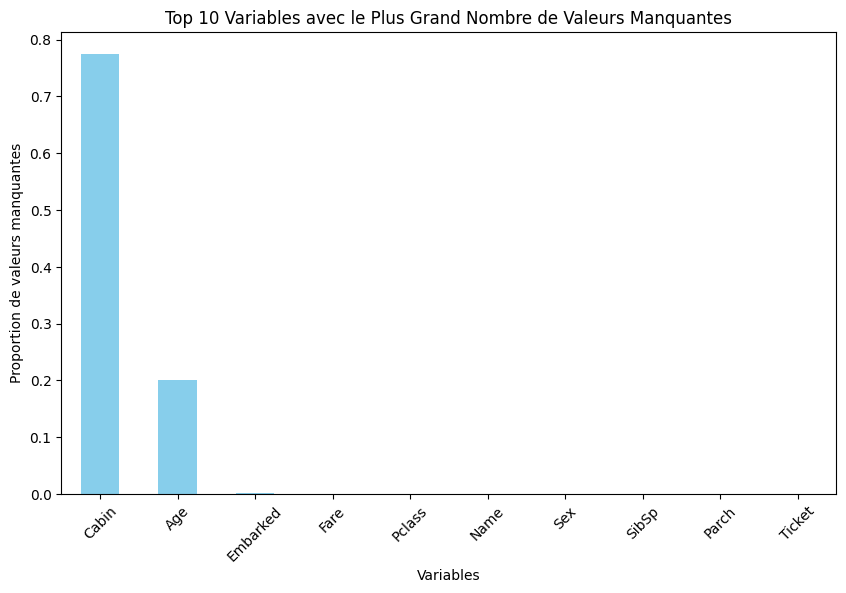

In [10]:
# Nous identifions les variables possédant la plus grande part de valeurs manquantes
missing_values = (data.isnull().sum() / len(data)).sort_values(ascending=False).head(10)

# Créer un diagramme à barres
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Top 10 Variables avec le Plus Grand Nombre de Valeurs Manquantes')
plt.xlabel('Variables')
plt.ylabel('Proportion de valeurs manquantes')
plt.xticks(rotation=45)
plt.show()

In [11]:
data.drop('Cabin', axis=1, inplace=True)
data.Age.fillna(data.Age.median(), inplace=True)
data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)

In [12]:
(data.isnull().sum() / len(data)).sort_values(ascending=False).head(10)

Fare        0.000764
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Embarked    0.000000
dtype: float64

In [13]:
data.Fare.fillna(data.Fare.median(), inplace=True)

***gestion des doublons***

In [14]:
data.duplicated().sum()

0

# 5. Exploration des données

***analyses univariées***

> variables numériques

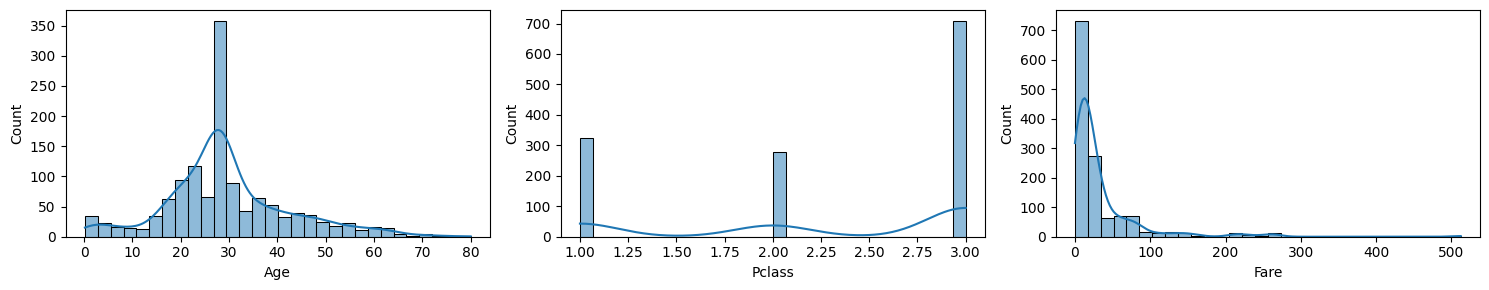

In [15]:
# Distribution des variables numériques
numeric_vars = ['Age', 'Pclass', 'Fare']

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

for i, var in enumerate(numeric_vars):
    sns.histplot(data[var], bins=30, kde=True, ax=axes[i])

plt.tight_layout()
plt.show()

> variables catégoriques

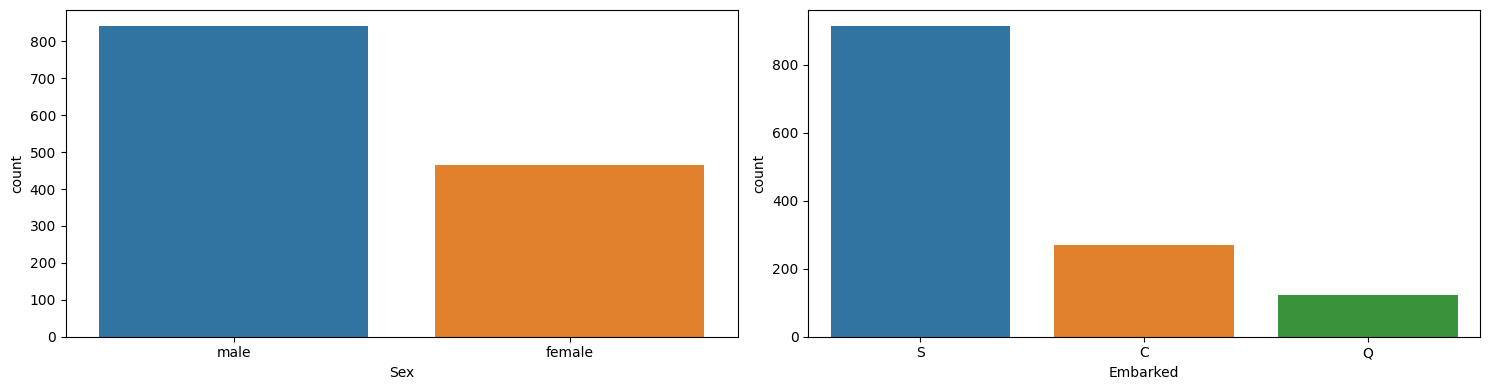

In [16]:
# Distribution des variables numériques
numeric_vars = ['Sex', 'Embarked']

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

for i, var in enumerate(numeric_vars):
    sns.countplot(x=var, data=data, ax=axes[i])

plt.tight_layout()
plt.show()

***analyses bivariées***

In [17]:
train = data[:train.shape[0]]
test = data[train.shape[0]:]
y = target

In [18]:
data_temp = pd.concat([train, y], axis=1)

***variables numériques***

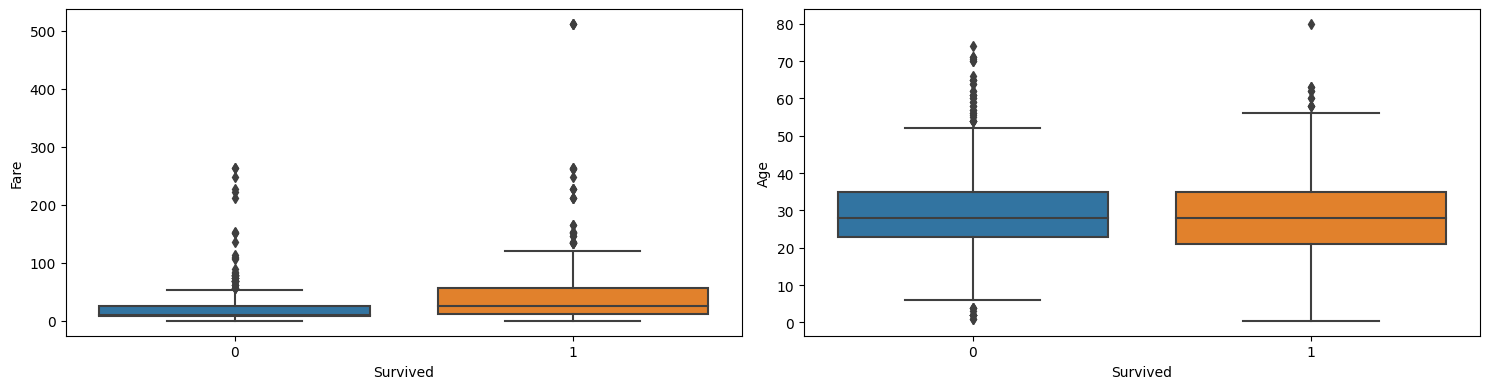

In [19]:
var = ['Fare', 'Age']

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

for i, var in enumerate(var):
    sns.boxplot(x='Survived', y=var, data=data_temp, ax=axes[i])

plt.tight_layout()
plt.show()

***variables catégorielles***

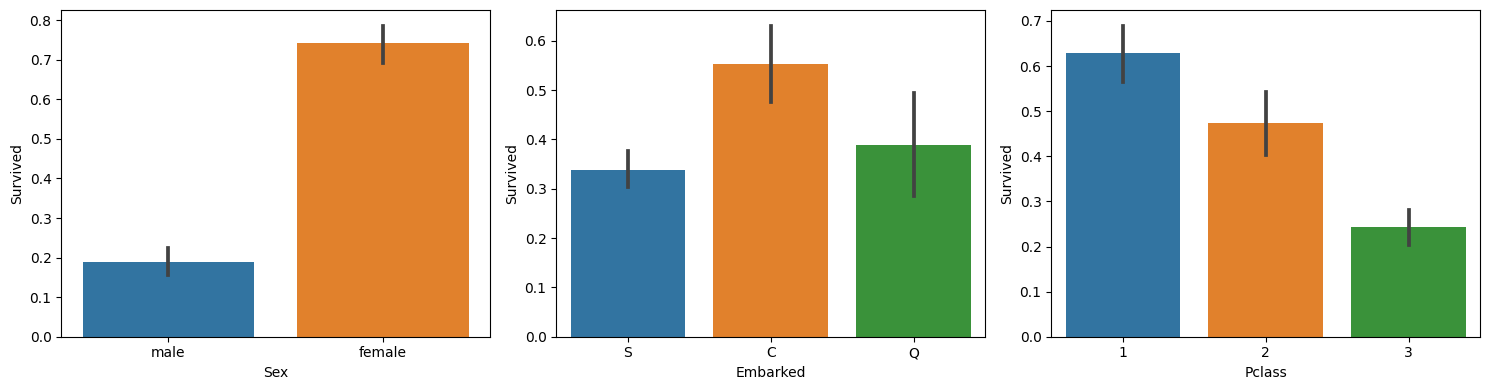

In [20]:
var = ['Sex', 'Embarked', 'Pclass']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, var in enumerate(var):
    sns.barplot(x=var, y='Survived', data=data_temp, ax=axes[i])
    if(i==3):
        sns.barplot(x='Pclass', y='Survived', data=data_temp, ax=axes[i])

plt.tight_layout()
plt.show()

***heatmap de corrélation***

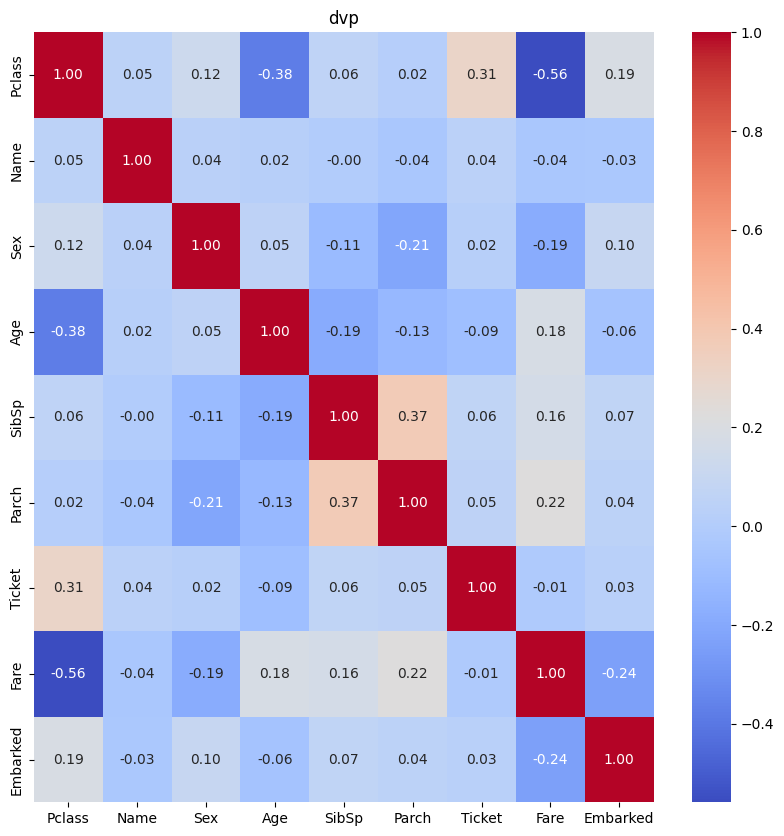

In [21]:
data_temp = data.copy()

label_encoder = LabelEncoder()

for col in data_temp.select_dtypes(include="object").columns:
    data_temp[col] = label_encoder.fit_transform(data_temp[col]).astype(int)

correlation_matrix = data_temp.corr()

# Affichage de la matrice de corrélation à l'aide de seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('dvp')
plt.show()

# 6. Transformation des données pour les arbres

***suppréssion de caractéristiques***

In [22]:
data.drop('Name', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)

In [23]:
data_copy = data.copy()

# 7. Modélisation basée sur les arbres

In [24]:
data = pd.get_dummies(data)

In [25]:
train = data[:train.shape[0]]
test = data[train.shape[0]:]
y = target

In [26]:
# les différents modèles évalués
models = [
    ('random forrest', RandomForestClassifier(random_state=0)),
    ('gradient boost', GradientBoostingClassifier(random_state=0)),
    ('ada boost', AdaBoostClassifier(random_state=0))
]

# le dictionnaire dans lequel nous stockons les résultats des différents modèles
scores_dict = {}

for name, model in models:
    # validation croisée
    scores = cross_val_score(model, train, y, cv=5, scoring='accuracy')
    scores_dict[name] = {
        'average Accuracy': np.mean(scores),
        'average Variance': np.var(scores)
    }

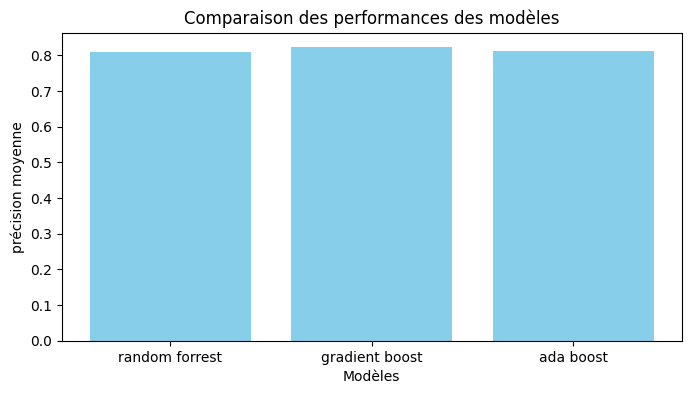

In [27]:
# Extraction des noms des modèles et des RMSE moyens
model_names = list(scores_dict.keys())
average_rmse = [scores_dict[name]['average Accuracy'] for name in model_names]

# Création du graphique en barres
plt.figure(figsize=(8, 4))
plt.bar(model_names, average_rmse, color='skyblue')
plt.xlabel('Modèles')
plt.ylabel('précision moyenne')
plt.title('Comparaison des performances des modèles')

plt.show()

In [28]:
gb_accuracy = scores_dict['gradient boost']['average Accuracy']

In [29]:
model_gb = GradientBoostingClassifier(random_state=0).fit(train, y)
gb_preds = model_gb.predict(test)

# 8 Transformation des données pour les modèles linéaires 

In [30]:
data = data_copy.copy()
train = data[:train.shape[0]]
test = data[train.shape[0]:]
y = target

***Traitement des outliers***

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 81.8+ KB


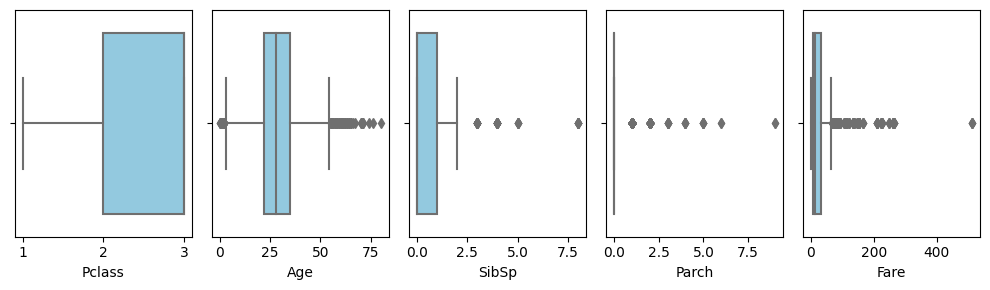

In [32]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns


fig, axes = plt.subplots(1, 5, figsize=(10, 3))

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data[col], ax=axes[i], color='skyblue')

plt.tight_layout()
plt.show()

In [33]:
index_list = []

index_list.extend(train[train.SibSp > 6].index)
index_list.extend(train[train.Parch > 8].index)
index_list.extend(train[train.Fare > 400].index)

train.drop(index_list, inplace=True)
target.drop(index_list, inplace=True)

In [34]:
data = pd.concat((train, test))

***Traitement de la distribution des valeurs***

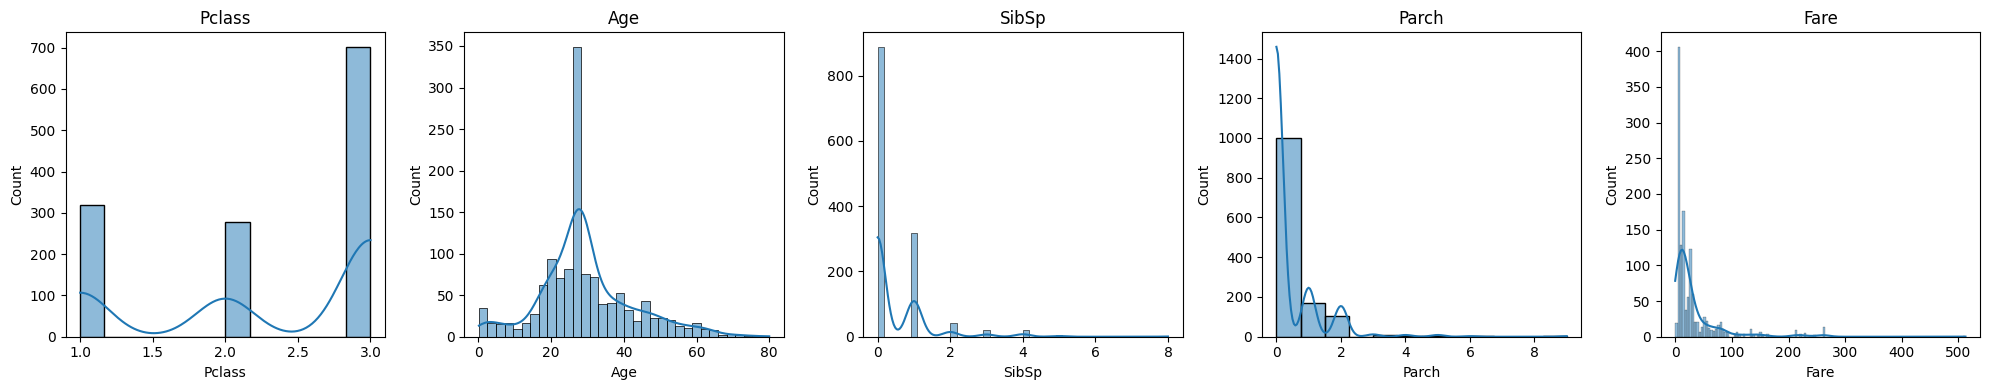

In [35]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

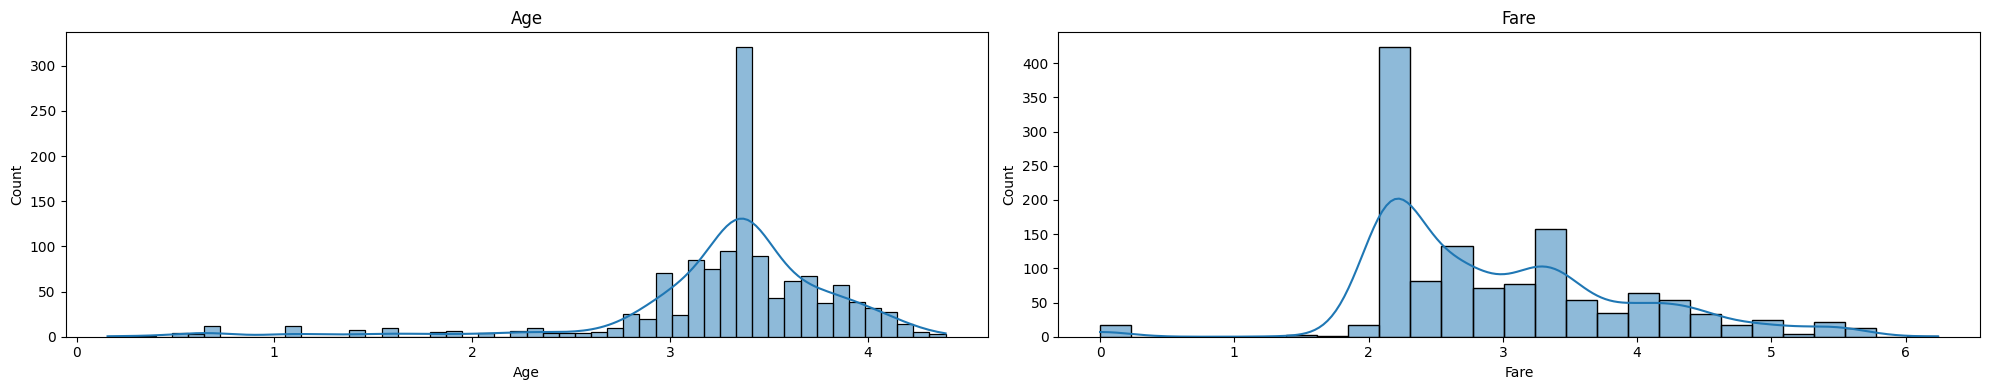

In [36]:
col = ['Age', 'Fare']
dvp = np.log1p(data[col])

fig, axes = plt.subplots(1, 2, figsize=(20, 4))

for i, col in enumerate(col):
    sns.histplot(dvp[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()

In [37]:
data[col] = np.log1p(data[col])

***Standardisation***

In [38]:
data = pd.get_dummies(data)

In [39]:
# nous récupérons nos données d'entraînement et nos données de test 
train = data[:train.shape[0]]
test = data[train.shape[0]:]
y = target

In [40]:
# Créer une instance du scaler StandardScaler
scaler = StandardScaler()

# Adapter le scaler aux données et les transformer
train = scaler.fit_transform(train)
test = scaler.transform(test)

# 9. Modélisation linéaire 

In [41]:
models = [
    ('Logistic Regression', LogisticRegression(random_state=0)),
    ('k-NN', KNeighborsClassifier()),
    ('SVM', SVC(kernel='linear', random_state=0))
]

scores_dict = {}

for name, model in models:
    scores = cross_val_score(model, train, y, cv=5, scoring='accuracy')
    scores_dict[name] = {
        'average Accuracy': np.mean(scores),
        'Variance': np.var(scores)
    }

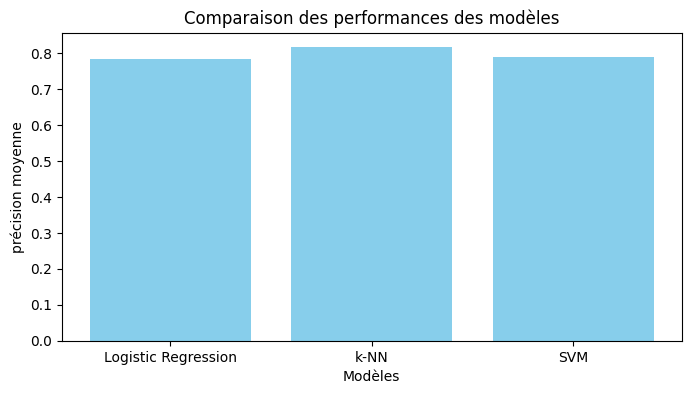

In [42]:
# Extraction des noms des modèles et des RMSE moyens
model_names = list(scores_dict.keys())
average_rmse = [scores_dict[name]['average Accuracy'] for name in model_names]

# Création du graphique en barres
plt.figure(figsize=(8, 4))
plt.bar(model_names, average_rmse, color='skyblue')
plt.xlabel('Modèles')
plt.ylabel('précision moyenne')
plt.title('Comparaison des performances des modèles')

plt.show()

In [43]:
log_accuracy = scores_dict['Logistic Regression']['average Accuracy']

In [44]:
model_log = LogisticRegression(random_state=0).fit(train, y)
log_preds = model_log.predict(test)

# 10. Soumission

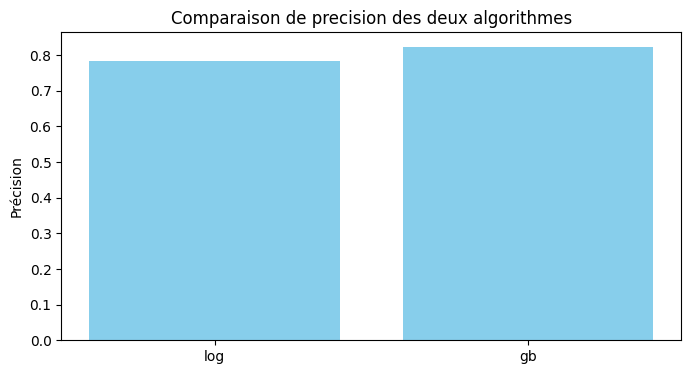

In [45]:
plt.figure(figsize=(8, 4))
plt.bar(['log', 'gb'], [log_accuracy, gb_accuracy], color='skyblue')
plt.ylabel('Précision')
plt.title('Comparaison de precision des deux algorithmes')
plt.show()

In [46]:
solution = pd.DataFrame({'PassengerId':test_id, 'Survived':gb_preds})
solution.to_csv("/kaggle/working/submission.csv", index = False)